# Milestone 2

##### Carlos Diaz Molina
---
In this milestone we will interact with the data (i.e. the rows and columns), to help us direct our study and analysis of the data. By doing this, we will be able to answer the research questions we may have.

>Firstly, we would load the data using the function

`pd.read_csv()`

However, on this file, we will process the csv in the next cell using `load_and_process()`

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.project_functions import *

data ='../../data/raw/Gamesales.csv'
df = unprocessed(data)
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

print("Number of rows and columns respectively:", df.shape)
print("Columns in the dataset:", df.columns)

Number of rows and columns respectively: (16719, 16)
Columns in the dataset: Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [3]:
df.describe(include='float64')

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [4]:
df.describe(include='object')

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16717,16719,16717,16665,10015,10096,9950
unique,11562,31,12,581,96,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,12,2161,3370,1356,2425,204,3991


#### 1. Initial Remarks

There are a lot of cells that contain values equal to zero or NaN (as seen from the count values of Critic compared to number of rows stated on the previous cell).

It can also be noted that the number of sales is bigger in the NA region compared to the others ones.

It can also be noted that many games do not include User_Score values, Rating and Developer information (as noted by the count of rows in each column compared to total row count).

#### 2. Work with data

We will focus on the Genre of games that were taken into account in this dataset, as well as the number of sales that have taken place accross the different region throughtout time. 

 We will create two data frames, which will be used for different purposes each (and maybe a third based on platform but only if needed)

In [5]:
df1 = df.groupby('Year_of_Release', as_index=False).sum()
df1.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,1980.0,10.59,0.67,0.00,0.12,11.38,0.0,0.0,0.0
1,1981.0,33.40,1.96,0.00,0.32,35.77,0.0,0.0,0.0
2,1982.0,26.92,1.65,0.00,0.31,28.86,0.0,0.0,0.0
3,1983.0,7.76,0.80,8.10,0.14,16.79,0.0,0.0,0.0
4,1984.0,33.28,2.10,14.27,0.70,50.36,0.0,0.0,0.0


In [6]:
df2 = df.drop(columns=['Year_of_Release', 'Critic_Score', 'Critic_Count']).groupby('Genre', as_index=False).sum()
df2.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count
0,Action,879.01,519.13,161.44,184.60,1745.27,345668.0
1,Adventure,105.26,63.54,52.30,16.49,237.69,31023.0
2,Fighting,223.36,100.33,87.48,36.36,447.48,25907.0
3,Misc,407.27,212.74,108.11,74.39,803.18,13659.0
4,Platform,445.50,200.35,130.83,51.09,828.08,46707.0


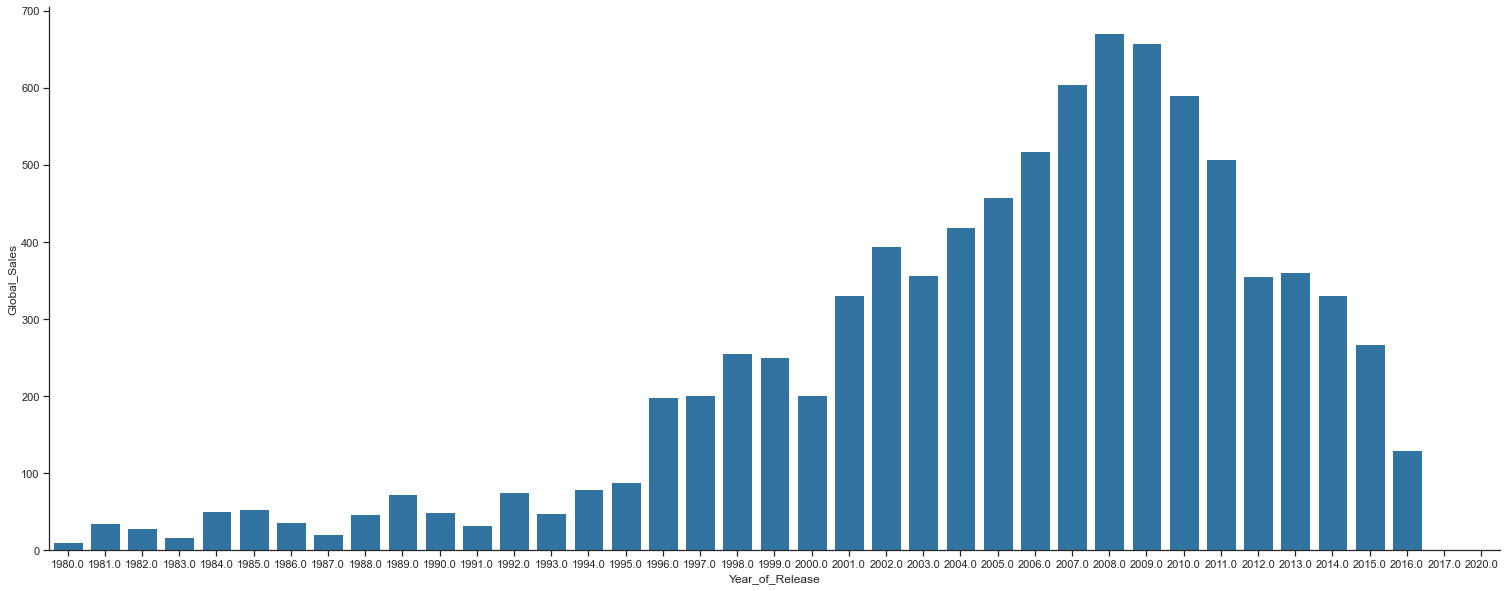

In [7]:
sns.set_theme(style="ticks", font_scale=1)
plt.figure(figsize=(26,10))
sns.barplot(x="Year_of_Release", y="Global_Sales", data=df1, color="tab:blue")
sns.despine()

It can be seen that, the number of global sales increases as time passes, reaching it highest peak on 2008. However, it is intersting how the data shows that global sales starts decreasing from here on. It would be intersting to see if this also takes place in some of the regions (such as NA or EU).

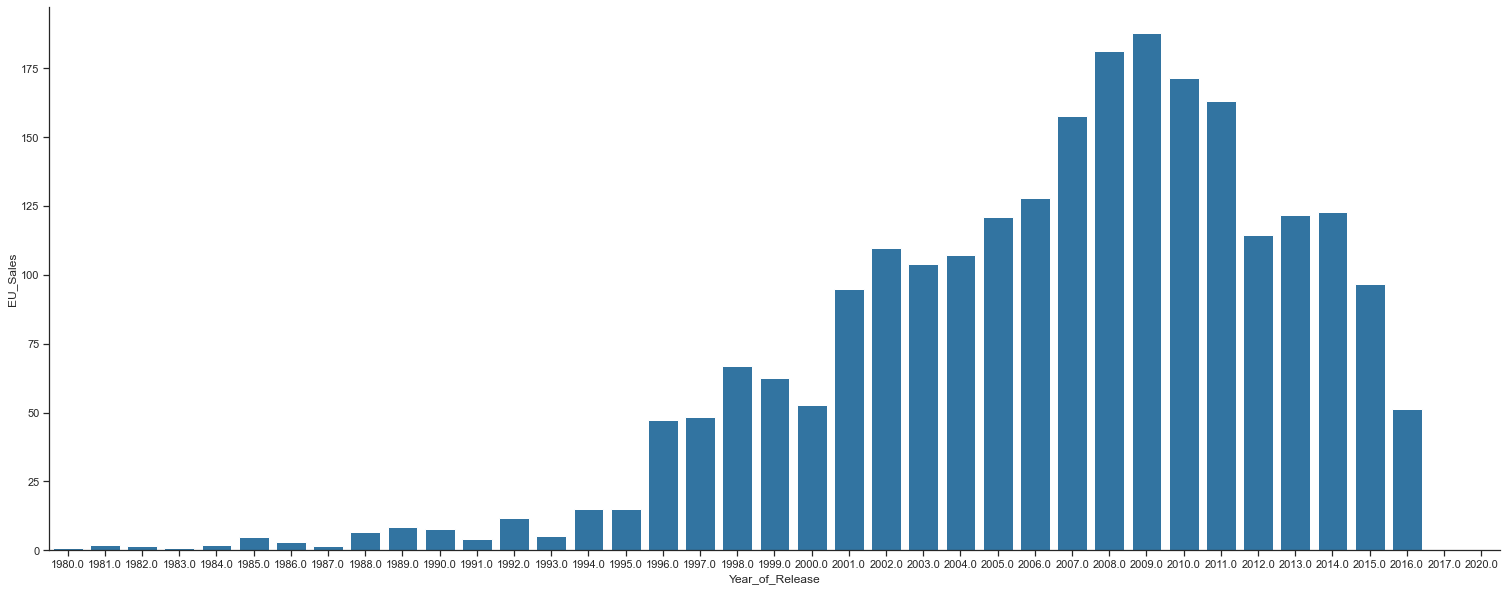

In [8]:
sns.set_theme(style="ticks", font_scale=1)
plt.figure(figsize=(26,10))
sns.barplot(x="Year_of_Release", y="EU_Sales", data=df1, color="tab:blue")
sns.despine()

In the EU graph, compared to the global_sales one, the highest peak takes place in 2009 instead of being in 2008. However, a similar situation takes place on both graphs, although less continous compared to the global graph.

Let us look at NA_sales this time:

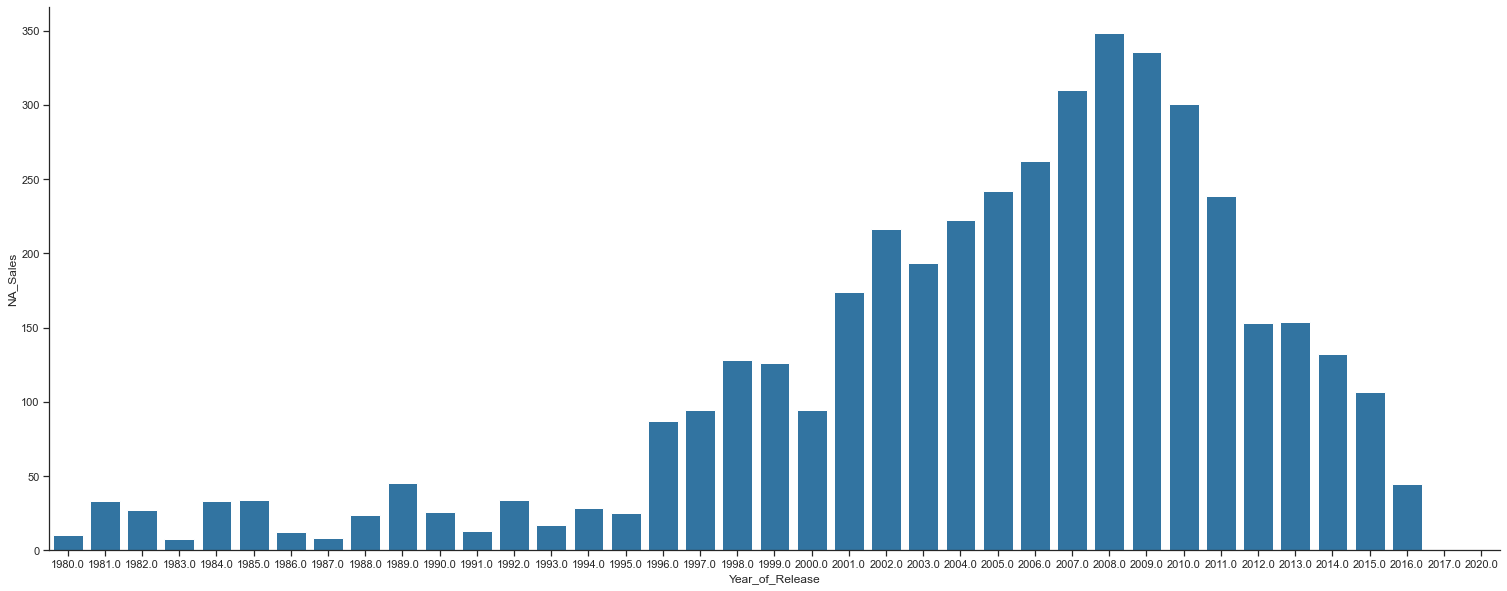

In [9]:
sns.set_theme(style="ticks", font_scale=1)
plt.figure(figsize=(26,10))
sns.barplot(x="Year_of_Release", y="NA_Sales", data=df1, color="tab:blue")
sns.despine()

When comparing both regions (NA and EU), it can be perceived how the number of sales accross the different years was more significant between the two of them. However, both retain the same trend overall. 

**Let us look at genre now:**

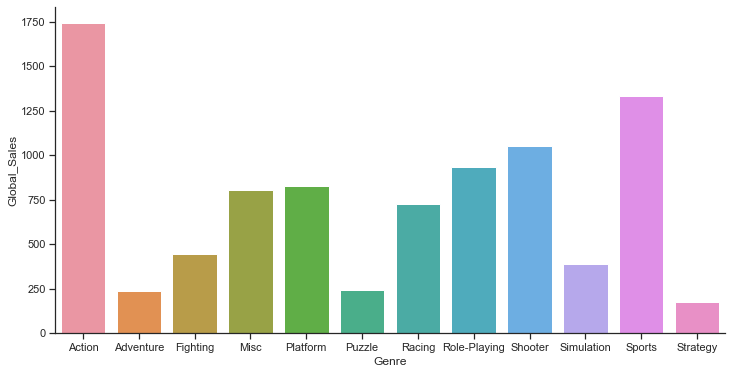

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x="Genre", y="Global_Sales", data=df2)
sns.despine()

From this graph, it could be deduced that action games are the most relevant in all the different regions overall. But, lets chec between NA and JP regions to see if this is the case indeed.

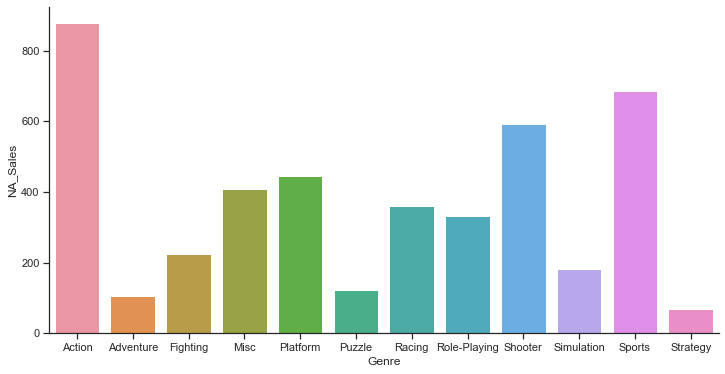

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x="Genre", y="NA_Sales", data=df2)
sns.despine()

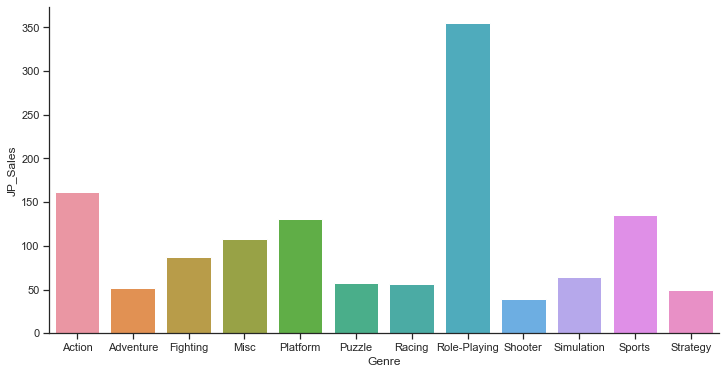

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x="Genre", y="JP_Sales", data=df2)
sns.despine()

Although action games have a great impact on the NA region (and maybe even on the EU region as well), in the other major region, Japan, the most relevant genre of games are Role-Playing games. Action games are the second genre on the region, nonetheless but not the most popular. 